In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import (kstest, levene, shapiro, 
                         probplot, f_oneway, chi2_contingency,
                         pearsonr, linregress)
import matplotlib.pyplot as plt

## 0. Exploration rapide des données

In [3]:
data = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')
df = pd.DataFrame(data)
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [5]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


### Conclusion:
On peut dire que nos données sont propres et coerente car aucune valeur null ou aberante ne parait, nous pouvons passer au differents test.

## 1. Test de Normalité -- KS Test

In [ ]:
Performance_Score = df['Performance_Score']
# test KS
stat, ks_p_value = kstest(
    Performance_Score,
    'norm'
)

print(ks_p_value)

0.0


<Axes: xlabel='Performance_Score', ylabel='Count'>

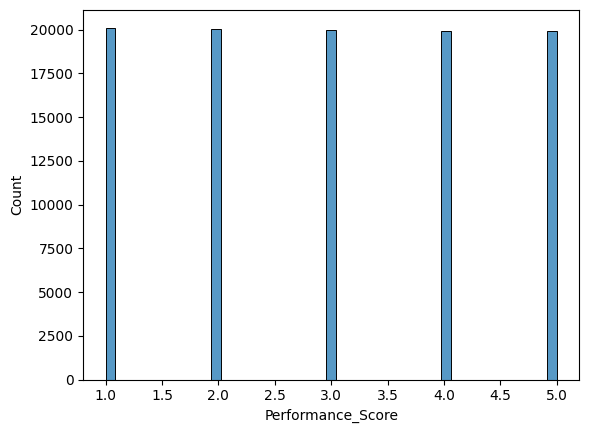

In [32]:
sns.histplot(df['Performance_Score'])

## 2. Test de variance(homegeneité)

Question-1: Les scores de performance diffèrent-ils selon le département ?

In [8]:
print(df['Department'].unique())

['IT' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'HR'
 'Operations' 'Sales' 'Legal']


In [9]:
#IT, Finance, Customer_support, Engineering, Marketing, HR, Operations, Sales, Legal =[]
IT_performance = df.loc[df['Department']=='IT', 'Performance_Score']
Finance_performance = df.loc[df['Department']=='Finance', 'Performance_Score']
Customer_support_performance = df.loc[df['Department']=='Customer Support', 'Performance_Score']
Engineering_performance = df.loc[df['Department']=='Engineering', 'Performance_Score']
Marketing_performance = df.loc[df['Department']=='Marketing', 'Performance_Score']
HR_performance = df.loc[df['Department']=='HR', 'Performance_Score']
Operations_performance = df.loc[df['Department']=='Operations', 'Performance_Score']
Sales_performance = df.loc[df['Department']=='Sales', 'Performance_Score']
Legal_performance = df.loc[df['Department']=='Legal', 'Performance_Score']

In [ ]:
# Faisons le test de Levene pour savoir si les different groupe sont pareil en terme de dispersion(
# s'ils sont homogène)
stat, levene_p_value = levene(IT_performance, Finance_performance,
                              Customer_support_performance, Engineering_performance,
                              Marketing_performance, HR_performance, Operations_performance,
                              Sales_performance, Legal_performance,
                              center='median',
                              proportiontocut=0.05, 
                              axis=0, nan_policy='propagate', 
                              keepdims=False
                              )
print(f"p_value: {levene_p_value}")

p_value: 0.39404796431122074


Avec une p_value de 0.3940 on peut conclure qu'il n'y a pas de preuve statistique que la variance differe parmi les departements.
Puisque ne nous rejettons pas H0, nous pouvons faire une ANOVA classique

In [22]:
anova_stat, anova_p_value = f_oneway(IT_performance, Finance_performance,
                              Customer_support_performance, Engineering_performance,
                              Marketing_performance, HR_performance, Operations_performance,
                              Sales_performance, Legal_performance)
print(f"p_value: {anova_p_value}")

p_value: 0.467322553218532


Avec une telle p_value on peut dire qu'il n'y a pas de preuve que la moyenne est differente entre les departements.
Nous pouvons meme le remarquer dans l'histogramme suivant:

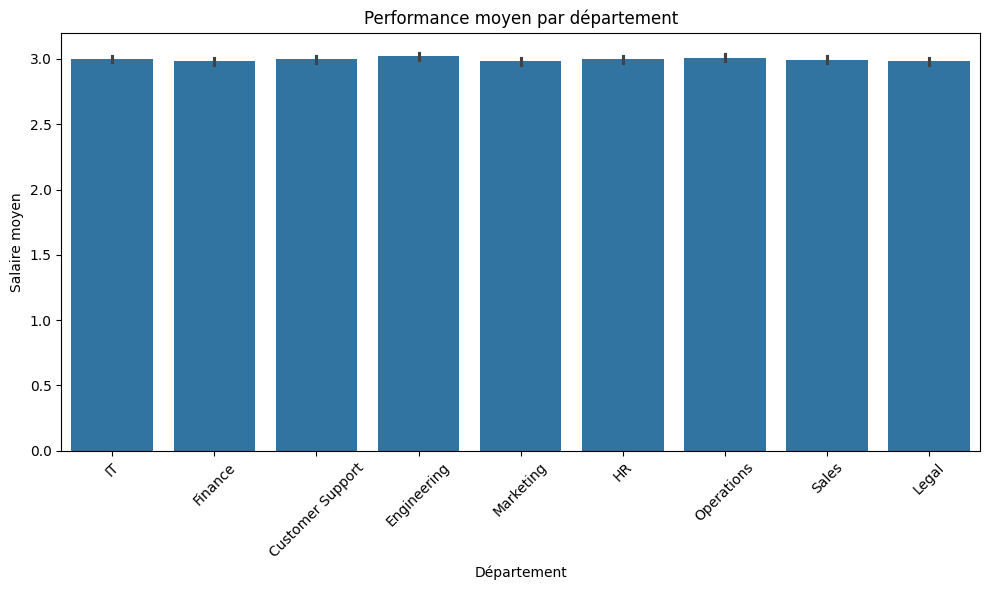

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="Department",      # catégories
    y="Performance_Score",          # valeurs numériques
    estimator="mean",    # (par défaut c’est la moyenne)
)
plt.xticks(rotation=45)
plt.title("Performance moyen par département")
plt.xlabel("Département")
plt.ylabel("Salaire moyen")
plt.tight_layout()
plt.show()


Question-2: Les salaires diffèrent-ils selon le département ?

In [33]:
IT_salary = df.loc[df['Department']=='IT', 'Monthly_Salary']
Finance_salary = df.loc[df['Department']=='Finance', 'Monthly_Salary']
Customer_support_salary = df.loc[df['Department']=='Customer Support', 'Monthly_Salary']
Engineering_salary = df.loc[df['Department']=='Engineering', 'Monthly_Salary']
Marketing_salary = df.loc[df['Department']=='Marketing', 'Monthly_Salary']
HR_salary = df.loc[df['Department']=='HR', 'Monthly_Salary']
Operations_salary = df.loc[df['Department']=='Operations', 'Monthly_Salary']
Sales_salary = df.loc[df['Department']=='Sales', 'Monthly_Salary']
Legal_salary = df.loc[df['Department']=='Legal', 'Monthly_Salary']

In [34]:
# Faisons le test de Levene pour savoir si les different groupe sont pareil en terme de dispersion(
# s'ils sont homogène)
stat, levene_p_value = levene(IT_salary, Finance_salary,
                              Customer_support_salary, Engineering_salary,
                              Marketing_salary, HR_salary, Operations_salary,
                              Sales_salary, Legal_salary,
                              center='median',
                              proportiontocut=0.05, 
                              axis=0, nan_policy='propagate', 
                              keepdims=False
                              )
print(f"p_value: {levene_p_value}")

p_value: 0.2825165712349757


In [35]:
anova_stat, anova_p_value = f_oneway(IT_salary, Finance_salary,
                              Customer_support_salary, Engineering_salary,
                              Marketing_salary, HR_salary, Operations_salary,
                              Sales_salary, Legal_salary)
print(f"p_value: {anova_p_value}")

p_value: 0.450007254747677


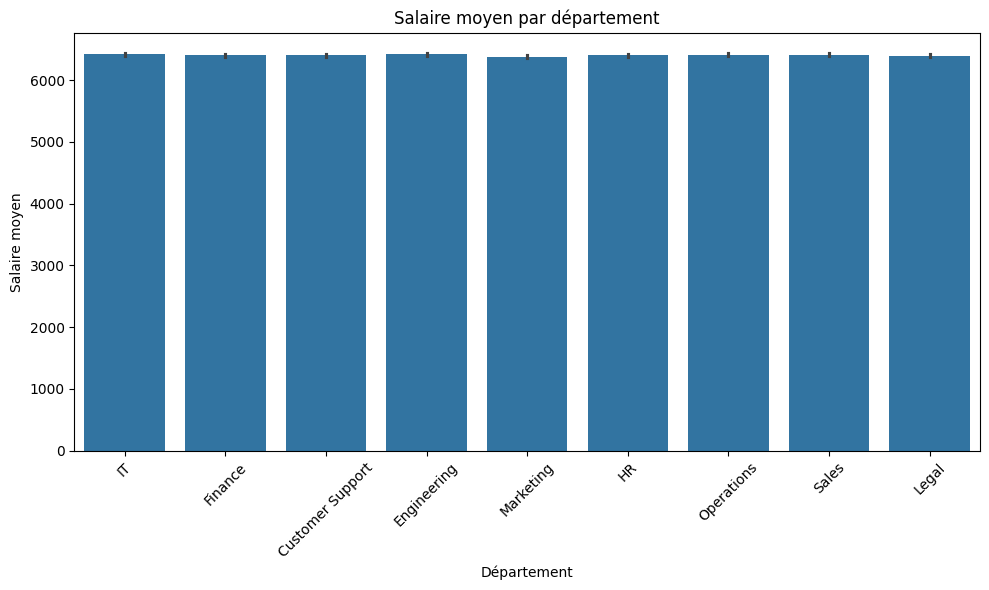

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="Department",      # catégories
    y="Monthly_Salary",          # valeurs numériques
    estimator="mean",    # (par défaut c’est la moyenne)
)
plt.xticks(rotation=45)
plt.title("Salaire moyen par département")
plt.xlabel("Département")
plt.ylabel("Salaire moyen")
plt.tight_layout()
plt.show()


## Test 3 - relations qualitatives 
**Question 1: Verifier si la satisfaction des employés depend du departement**

In [13]:
# Normalisation des scores de satisfaction
df.loc[df['Employee_Satisfaction_Score'] <= 2.49, 'Satisfaction'] = 'Insatisfait'
df.loc[df['Employee_Satisfaction_Score'] == 2.5, 'Satisfaction'] = 'Neutre'
df.loc[(df['Employee_Satisfaction_Score'] > 2.5) & (df['Employee_Satisfaction_Score'] < 4.00), 'Satisfaction'] = 'Satisfait'
df.loc[df['Employee_Satisfaction_Score'] >= 4.00, 'Satisfaction'] = 'Très satisfait'

df.head()


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Satisfaction
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,...,32,22,2,0,14,66,0,2.63,False,Satisfait
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,...,34,13,14,100,12,61,2,1.72,False,Insatisfait
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,...,27,6,3,50,10,1,0,3.17,False,Satisfait
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,...,10,28,12,100,10,0,1,1.86,False,Insatisfait
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,...,11,29,13,100,15,9,1,1.25,False,Insatisfait


In [24]:
# Création du tableau croisé des observation
observed = pd.crosstab(df['Satisfaction'], df['Department'])
print(observed)

Department      Customer Support  Engineering  Finance    HR    IT  Legal  \
Satisfaction                                                                
Insatisfait                 4265         4056     4140  4108  4060   4225   
Neutre                        22           21       24    31    33     18   
Satisfait                   4127         4153     4231  4143  4153   4134   
Très satisfait              2702         2726     2805  2678  2885   2741   

Department      Marketing  Operations  Sales  
Satisfaction                                  
Insatisfait          4187        4065   4230  
Neutre                 40          33     33  
Satisfait            4199        4228   4046  
Très satisfait       2790        2855   2813  


### Test de Khi-deux

In [ ]:
# Test Khi-deux
chi2, p, dof, expected = chi2_contingency(observed)
print(f"Chi²: {chi2:.3f}")
print(f"p-value: {p:.3f}")
print(f"Degrés de liberté: {dof:.3f}")
#print("Valeurs attendues si pas de lien:\n", expected)


Chi²: 41.806
p-value: 0.014
Degrés de liberté: 24.000


### Resultat:
p-value: 0.013 < 0.05 donc on rejette Ho ce qui signifie que il existe vraiment une possibilité pour que le departement influence la satisfaction des employés, mais à quel point?

In [16]:
#Calcule du V-Cramer
n = observed.sum().sum()
ligne, colonne = observed.shape
v_cramer = (chi2/(n*min(ligne-1,colonne-1)))**0.5

print(ligne, colonne, n)
print(f"V-Cramer: {v_cramer:.3f}")

4 9 100000
V-Cramer: 0.012


Avec un v-cramer = 0.012, on peut dire que le degrès de satisfaction des employées ne depend que très infimement du departement auquel ils sont assignés, mais quand est-il d'autre variable tels que le titre du travail ou encore l'education?

Si on prend Education_Level par exemple, est-ce que le fait d'avoir un master ou une licence influence dans le degrée de satisfaction des employées de cette boite?

In [17]:
# Mise à jour du tableau croisé des observation
observed = pd.crosstab(df['Satisfaction'], df['Education_Level'])
print(observed)

Education_Level  Bachelor  High School  Master   PhD
Satisfaction                                        
Insatisfait         18698        11124    5628  1886
Neutre                123           75      38    19
Satisfait           18724        11256    5564  1870
Très satisfait      12496         7549    3674  1276


In [18]:
# Test Khi-deux
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi²: {chi2:.3f}")
print(f"p-value: {p:.3f}")
print(f"Degrés de liberté: {dof:.3f}")

Chi²: 5.889
p-value: 0.751
Degrés de liberté: 9.000


Avec p-value > 0.05 on peut dire que on ne rejette pas H0, donc il n'y a pas moyen de dire que l'education des employées influence leurs satisfaction au sein de l'entreprise

**Question 2: Verifier si la satisfaction des employés depend du salaire**

In [ ]:
# Mise à jour du tableau de conteigence
observed = pd.crosstab(df['Satisfaction'], df['Mon'])
print(observed)

## Test 4: Tests pour les relations quantitatives

In [51]:
stat, pearson_p_value = pearsonr(df['Monthly_Salary'], df['Work_Hours_Per_Week'])
print(f"p_value: {pearson_p_value}, coefficient de pearson: {stat}")

p_value: 0.45794219617999177, coefficient de pearson: -0.0023471937265511426


Vu que le coefficient de pearson est egal à 0 on peut dire qu'il n'y a aucune relation entre le salair et le nombre d'heure par semaine.